<p style="text-align: center;">МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РОССИЙСКОЙ ФЕДЕРАЦИИ
<p style="text-align: center;">Федеральное государственное автономное образовательное учреждение высшего образования «Самарский национальный исследовательский университет имени академика С. П. Королева» (Самарский университет)</p>
<br> <br> <br>
<p style="text-align: center;">Институт информатики и кибернетики
<p style="text-align: center;">Факультет информатики
<p style="text-align: center;">Кафедра программных систем
<br><br><br>
<p style="text-align: center;">ОТЧЁТ
<p style="text-align: center;">по лабораторной работе № 2
<p style="text-align: center;">«Интеллектуальный анализ данных с библиотекой scikit-learn»
<p style="text-align: center;">по курсу «Интеллектуальный анализ данных и большие данные»
<p style="text-align: center;">
<br><br><br><br><br><br><br><br>
<p style="text-align: right;">Выполнил: Яшин И.А.
<p style="text-align: right;">гр. 6132-020402D
<p style="text-align: right;">
<br><br><br><br><br><br><br><br><br>
<p style="text-align: center;">Самара 2025

# Интеллектуальный анализ данных с библиотекой scikit-learn


## Упражнение 1

Протестируйте примеры matplotlib в блокноте: скопируйте ссылку на исходный код ``Source Code`` на каждой странице и поместите ее в блокнот, используя магию ``%load``. Используйте следующие ссылки:

https://matplotlib.org/2.0.2/mpl_examples/lines_bars_and_markers/fill_demo.py

http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py

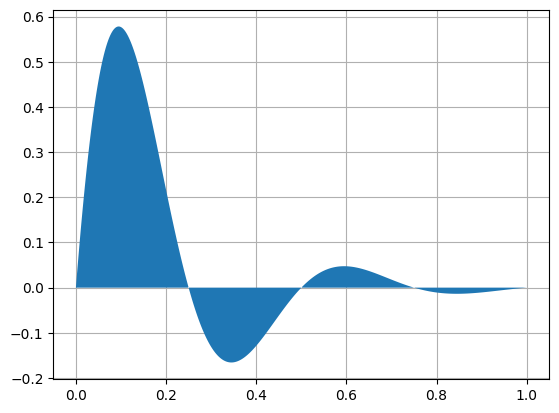

In [2]:
# %load https://matplotlib.org/2.0.2/mpl_examples/lines_bars_and_markers/fill_demo.py
"""
==================
A simple Fill plot
==================

This example showcases the most basic fill plot a user can do with matplotlib.
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()


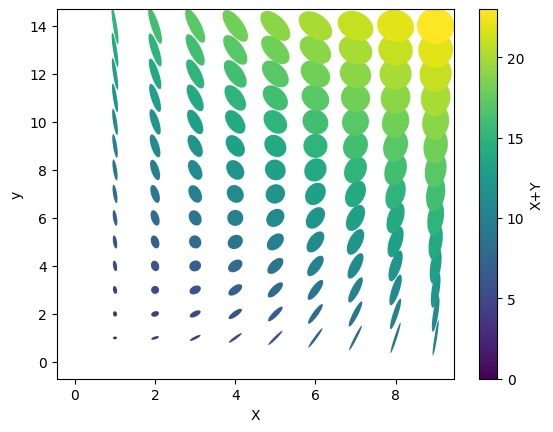

In [4]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.hstack((X.ravel()[:, np.newaxis], Y.ravel()[:, np.newaxis]))

ww = X/10.0
hh = Y/15.0
aa = X*9


fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       transOffset=ax.transData)
ec.set_array((X + Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()


## Упражнение 2

1) Введите данные в массив NumPy из файла iris5.data. Найдите образцы с ошибками в параметрах и удалите их из набора.
2) Введите данные в DataFrame из файла iris5.data. Найдите образцы с ошибками в параметрах и удалите их из набора.

In [ ]:
import numpy as np
from numbers import Number

# Введите данные в массив NumPy из файла iris5.data. Найдите образцы с ошибками в параметрах и удалите их из набора.
# example: 4.9,3.1,1.5,0.1,Iris-setosa
iris = np.genfromtxt("iris5.data", delimiter=",", skip_header=1, dtype=str)


def is_number(x):
    try:
        float(x)
        return True
    except ValueError:
        return False


v_is_number = np.vectorize(is_number)
mask_numbers = v_is_number(iris[:, :4]).all(axis=1)
mask_label = np.char.find(iris[:, 4], "Iris-") == 0
mask = mask_numbers & mask_label

iris_np_filtered = iris[mask]
iris_np_filtered.shape

(146, 5)

In [52]:
import pandas as pd

iris = pd.read_csv("iris5.data", header=0, names=["slength", "swidth", "plength", "pwidth", "name"])

numeric_columns = ["slength", "swidth", "plength", "pwidth"]
iris[numeric_columns] = iris[numeric_columns].apply(pd.to_numeric, errors="coerce")
mask_numbers = iris[numeric_columns].notna().all(axis=1)
mask_label = iris["name"].str.contains("Iris-", na=False)

iris_pd_filtered = iris[mask_numbers & mask_label]
iris_pd_filtered.shape

(146, 5)

## Упражнение 3

Классификация: 
1) Примените KNeighborsClassifier к набору данных `iris`. Поиграйте с разными значениями `n_neighbors` и понаблюдайте, как меняются результаты обучения и теста.
2) Примените RandomForestClassifier к набору данных `iris`. Поиграйте с разными значениями `n_neighbors` и понаблюдайте, как меняются результаты обучения и теста.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

iris = pd.read_csv("iris.data", header=0, names=["slength", "swidth", "plength", "pwidth", "name"])
X = iris.drop("name", axis=1)
y = iris["name"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn_uni_5n = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_uni_8n = KNeighborsClassifier(n_neighbors=8, weights="uniform")
knn_dist_5n = KNeighborsClassifier(n_neighbors=5, weights="distance")

knns = [knn_uni_5n, knn_uni_8n, knn_dist_5n]
for name, knn in zip(["Uniform 5 neighbors", "Uniform 8 neighbors", "Distance 5 neighbors"], knns):
    knn.fit(X_train, y_train)
    # predict
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    # accuracy
    print(
        f"{name:<23}: train accuracy: {accuracy_score(y_train, y_pred_train):.3f}, test accuracy: {accuracy_score(y_test, y_pred_test):.3f}"
    )

Uniform 5 neighbors    : train accuracy: 0.970, test accuracy: 0.940
Uniform 8 neighbors    : train accuracy: 0.970, test accuracy: 0.960
Distance 5 neighbors   : train accuracy: 1.000, test accuracy: 0.960


In [131]:
from sklearn.ensemble import RandomForestClassifier

rf_100 = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
rf_50 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_200 = RandomForestClassifier(n_estimators=5, max_depth=7, random_state=42)

rfs = [rf_100, rf_50, rf_200]

for name, rf in zip(["RF 100 trees", "RF 50 trees, depth=5", "RF 200 trees, depth=10"], rfs):
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    print(
        f"{name:<25}: train accuracy: {accuracy_score(y_train, y_pred_train):.3f}, test accuracy: {accuracy_score(y_test, y_pred_test):.3f}"
    )

RF 100 trees             : train accuracy: 0.980, test accuracy: 0.960
RF 50 trees, depth=5     : train accuracy: 1.000, test accuracy: 0.980
RF 200 trees, depth=10   : train accuracy: 0.990, test accuracy: 0.960


## Упражнение 4

Сокращение размерности:
Сравните результаты применения PCA, Isomap и t-SNE на 5-классовом подмножестве набора данных цифр (``load_digits(5)``).

*Указание:*
*Для t-SNE руководствуйтесь следующим примером из scikit-learn:*
https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)

# ...

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
from sklearn.manifold import Isomap


## Упражнение 5
Для набора данных (см. ячейку ниже) с неизотропными кластерами, на которых kmeans не работает, подберите алгоритм кластеризации, который хорошо выделяет очевидные кластеры.

<img src="images/set_3.png" width="400">

In [23]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# ...